In [37]:
#basics
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn helper
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#testing
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score,recall_score, precision_score

#models
import xgboost

In [38]:
def accuracy(pred,actual):
    return round(np.mean(pred == actual),3)

### Load, Split and Transform Data

In [39]:
data = pd.read_csv('DOWNSAMPLEcleanDataApr22.csv')
X = data.drop('ABORT', axis = 1)
y = data['ABORT']
print("Final X shape: " , X.shape)

Final X shape:  (790, 127)


In [40]:
X.head()

,LACT,ai1_DIM,outcome1AI,tmsbred,pregnancy_DIM,INDGST,INJURY,KETOSIS,lame,LDA,MAST,MET,MFEVER,PYO,PNEU,rtp,calvBCS,milkavg30,milkavg60,milkavg100,nadirDIM,nadirBCS,disease_events,milkmonth1,milkmonth2,milkmonth3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,3,88,1,2,88.0,0,0,0,0,0,0,0,0,0,0,0,3.40,75.55,93.15,98.14,19,2.7,0,75.547,110.761,111.348,3.4,3.40,3.40,3.40,3.40,3.40,3.20,3.20,3.10,3.10,3.00,3.00,3.00,2.9,2.80,2.8,2.80,2.80,2.80,2.70,2.80,2.80,2.80,2.80,2.80,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.8,2.8,2.80,2.80,2.8,2.8,2.80,2.8,2.80,2.80,2.80,2.80,2.8,2.80,2.8,2.8,2.80,2.70,2.80,2.80,2.80,2.80,2.80,2.80,2.80,2.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.80,2.90,2.90,2.90,2.90,2.90,3.00,2.90,2.90,2.90,2.9,2.9,2.90,2.90,2.90,2.90,2.90,2.80,2.80,2.80,2.90,2.90,2.90,2.90,2.90,2.9,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90
1,1,80,1,1,80.0,0,0,0,0,0,0,0,0,0,0,0,3.45,75.88,83.93,91.80,76,2.8,0,75.878,92.535,104.831,NaN,3.10,2.80,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.9,2.90,2.9,2.80,2.70,2.70,2.70,2.70,2.70,2.70,2.70,2.60,2.70,2.70,2.70,2.70,2.70,2.60,3.10,3.05,3.0,3.0,3.05,3.05,3.0,3.0,2.95,2.7,2.85,2.85,2.85,2.85,2.9,2.90,2.9,2.9,2.90,2.90,2.95,2.90,2.90,2.90,3.00,3.00,3.00,3.00,3.00,3.00,3.10,3.10,3.0,3.00,3.05,3.05,3.00,2.95,3.00,3.00,2.95,2.90,2.90,2.90,2.85,2.85,2.9,2.9,2.90,2.90,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.85,2.9,2.90,2.95,2.95,2.95,2.95,2.95,2.95,2.95
2,2,60,0,4,160.0,0,0,0,0,0,1,0,0,0,0,0,3.35,86.75,88.61,98.34,65,2.7,0,86.746,95.787,109.137,NaN,3.30,3.40,3.30,3.30,3.20,3.20,3.20,3.20,3.30,3.30,3.20,3.20,3.2,3.10,3.1,3.10,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.90,2.90,2.90,2.90,2.80,2.80,2.8,2.8,2.80,2.80,2.8,2.8,2.80,2.8,2.80,2.80,2.80,2.80,2.8,2.80,2.8,2.8,2.80,2.80,2.80,2.80,2.80,2.90,2.90,2.90,2.90,2.80,2.80,2.80,2.80,2.80,2.8,2.80,2.70,2.80,2.80,2.80,2.80,2.80,2.80,2.80,2.80,2.80,2.80,2.80,2.8,2.8,2.80,2.80,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.9,2.90,2.90,2.90,2.90,2.90,2.90,NaN,NaN
3,1,80,1,1,80.0,0,0,0,0,0,0,0,0,0,0,0,3.50,48.71,54.50,60.24,99,3.4,0,48.712,60.694,69.263,3.5,3.55,3.55,3.55,3.60,3.60,3.60,3.55,3.55,3.55,3.55,3.55,3.50,3.5,3.45,3.5,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.40,3.45,3.40,3.4,3.4,3.40,3.40,3.5,3.5,3.50,3.5,3.50,3.50,3.50,3.50,3.4,3.40,3.4,3.4,3.45,3.45,3.45,3.45,3.50,3.50,3.50,3.45,3.45,3.30,3.30,3.30,3.30,3.30,3.3,3.50,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.5,3.5,3.50,3.50,3.50,3.30,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.50,3.50,3.5,3.50,3.55,3.55,3.55,3.55,3.55,3.40,3.40
4,1,108,1,2,108.0,0,0,0,0,0,0,0,0,0,0,0,3.67,45.05,57.21,61.82,46,3.4,0,45.051,69.367,70.035,3.5,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.45,3.40,3.40,3.40,3.35,3.4,3.45,3.4,3.40,3.40,3.40,3.35,3.45,3.40,3.40,3.35,3.35,3.35,3.35,3.40,3.40,3.40,3.45,3.60,3.60,3.6,3.6,3.60,3.60,3.6,3.6,3.50,3.6,3.45,3.40,3.35,3.40,3.4,3.35,3.3,3.3,3.35,3.40,3.40,3.40,3.45,3.45,3.45,3.40,3.45,3.45,3.45,3.45,3.45,3.45,3.5,3.45,3.45,3.45,3.50,3.45,3.50,3.50,3.50,3.55,3.50,3.50,3.45,3.45,3.5,3.5,3.45,3.45,3.40,3.40,3.40,3.45,3.45,3.45,3.50,3.50,3.50,3.50,3.50,3.5,3.45,3.50,3.50,3.50,3.50,3.50,3.45,3.50


In [41]:
unused_data = pd.read_csv('unusedDataApr22.csv')
X_unused = unused_data.drop('ABORT', axis = 1)
y_unused = unused_data['ABORT']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y , test_size=0.15 ,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  stratify=y_train, test_size=0.177,random_state=42)
print("Split: 70-15-15")
print("train shapes: " , X_train.shape, y_train.shape)
print("val shapes: ",X_val.shape, y_val.shape)
print("test shapes: ",X_test.shape, y_test.shape)

Split: 70-15-15
train shapes:  (552, 127) (552,)
val shapes:  (119, 127) (119,)
test shapes:  (119, 127) (119,)


In [43]:
X_train = X_train.fillna(X_train.mean())
X_train_last_100 = X_train.iloc[:, -101:]
pca = PCA(n_components=50, random_state=42)
pca.fit(X_train_last_100);

In [44]:
#data transformations: fill means, apply trained pca, select features
def transform_PCA_NaN(X,pca):
    X = X.fillna(X.mean())
    X_last_100 = X.iloc[:, -101:]

    X_last_100_pca = pca.transform(X_last_100)
    X = pd.DataFrame(np.hstack((X.iloc[:, :-101], 
                                     X_last_100_pca)),
                          columns =  list(X.columns[:-51]))
    
    return X

Transform Data (pca and fill nan on every set)

In [45]:
X_train_pca = transform_PCA_NaN(X_train, pca)
X_val_pca = transform_PCA_NaN(X_val, pca)
X_test_pca = transform_PCA_NaN(X_test, pca)
X_unused_pca = transform_PCA_NaN(X_unused, pca)

In [46]:
X_train_pca.head()

,LACT,ai1_DIM,outcome1AI,tmsbred,pregnancy_DIM,INDGST,INJURY,KETOSIS,lame,LDA,MAST,MET,MFEVER,PYO,PNEU,rtp,calvBCS,milkavg30,milkavg60,milkavg100,nadirDIM,nadirBCS,disease_events,milkmonth1,milkmonth2,milkmonth3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,3.0,60.0,1.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,70.47,80.43,83.45,51.0,3.3,0.0,70.470,90.731,89.916,-1.770615,-0.000820,0.015363,-0.119530,0.052094,-0.080654,0.001725,0.014010,0.030263,-0.072147,0.026800,0.042525,0.082793,-0.014467,-0.021192,0.011902,0.056666,0.017339,-0.039218,-0.014835,0.003912,0.023359,0.025253,-0.008674,0.007518,-0.010253,-0.016378,-0.007967,0.016820,0.002806,0.012074,0.017720,-0.015891,-0.018519,-0.000720,-0.003359,0.019803,-0.019911,-0.003276,0.005061,0.034273,0.010398,0.003036,0.013904,0.005884,-0.015710,0.016394,0.005468,-0.012420,0.006630
1,2.0,60.0,1.0,1.0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.80,102.86,108.66,113.16,33.0,2.2,0.0,102.858,114.664,121.918,5.515351,0.214123,0.225040,-0.044466,0.278437,0.165328,-0.354937,0.065108,-0.002776,-0.087413,0.002581,-0.283547,0.191673,-0.044622,-0.082901,-0.211729,-0.030037,0.063749,-0.068675,0.021499,0.159957,0.005107,-0.004071,0.040466,-0.004839,0.019725,-0.021926,-0.008665,-0.067029,-0.040255,-0.000552,0.030779,-0.014538,0.072918,0.048893,-0.043552,-0.003038,-0.040774,-0.011960,-0.015886,0.023616,0.033731,0.042168,0.040245,0.031746,0.006910,-0.008531,-0.023785,-0.033118,-0.038675
2,3.0,60.0,0.0,5.0,168.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.50,96.09,107.16,112.80,44.0,3.1,1.0,96.087,118.241,122.307,-1.231978,-0.479950,0.259396,-0.180255,0.031714,0.066799,-0.077511,-0.058864,-0.116733,0.161875,-0.006824,0.211848,0.163242,0.022081,-0.055438,0.025162,0.164009,-0.019364,0.022801,-0.103729,0.028187,0.104715,-0.109212,-0.034085,0.038498,0.001925,0.039038,0.022905,0.041499,-0.046633,-0.015925,0.009571,0.009970,0.001422,-0.008914,0.042863,0.028549,-0.053699,0.023784,-0.068613,0.074455,-0.006865,0.014712,-0.039995,0.034629,0.085651,-0.079509,0.076433,-0.022442,0.003410
3,1.0,80.0,0.0,3.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.53,61.13,77.23,86.28,48.0,2.9,0.0,61.130,93.860,100.348,0.756497,-0.456772,0.477426,-0.036468,-0.156685,0.423977,0.200410,-0.100562,-0.327644,-0.057757,0.215138,-0.092661,-0.118447,0.038927,0.111683,0.131244,-0.069041,-0.012123,0.105349,0.026645,-0.020971,-0.024683,0.032951,0.053986,-0.043239,-0.086430,0.072439,0.004120,0.037496,-0.042122,-0.042584,-0.012807,0.005035,-0.067155,-0.013984,0.095514,0.076090,0.010733,0.013015,-0.012447,-0.005737,-0.044413,-0.039125,-0.027437,-0.045236,0.002685,-0.047590,0.014352,0.028048,-0.032463
4,1.0,80.0,0.0,8.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.13,50.04,58.67,66.00,1.0,3.1,0.0,50.037,67.894,77.789,-0.741113,0.193534,-0.201679,0.032720,-0.053010,0.015372,-0.043223,-0.063674,0.008904,0.124564,0.002267,-0.078198,-0.019420,0.021036,-0.029963,-0.048092,0.079032,-0.087289,0.002017,0.137528,0.010121,0.002696,0.047006,0.004875,-0.022539,-0.021635,0.034293,0.049301,0.001141,0.034356,-0.017551,-0.024465,0.050857,-0.001584,0.038274,0.029579,-0.041743,0.076178,-0.003225,-0.022620,-0.036015,0.005941,-0.018016,-0.019786,0.002854,0.025966,0.021274,0.037592,0.038442,-0.033680


In [47]:
X_train_pca.shape, X_val_pca.shape

((552, 76), (119, 76))

### Train Model and Test

In [48]:
xgb = xgboost.XGBClassifier(random_state = 42)
xgb.fit(X_train_pca, y_train);

In [49]:
print("Final Scores")
print("**************************************************** ")
y_pred = xgb.predict(X_train_pca)
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", 100 * round(accuracy,5) , '%')
print(" ")
y_pred = xgb.predict(X_val_pca)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", 100 * round(accuracy,3) , '%')
print(" ")
y_pred = xgb.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", 100 * round(accuracy,3) , '%')
f1 = f1_score(y_test, y_pred)
print("Test F1 Score:",100 * round(f1,3), '%')
recall = recall_score(y_test, y_pred)
print("Test Recall:", 100 *round(recall,3), '%')
precision = precision_score(y_test, y_pred)
print("Test Precision:", 100 * round(precision,3), '%')
print(" ")

y_pred = xgb.predict(X_unused_pca)
accuracy = accuracy_score(y_unused, y_pred)
print("Unused Data Accuracy (All 0's):", 100 * round(accuracy,4) , '%')
print("**************************************************** ")

Final Scores
**************************************************** 
Train Accuracy: 100.0 %
 
Validation Accuracy: 81.5 %
 
Test Accuracy: 79.0 %
Test F1 Score: 80.0 %
Test Recall: 84.7 %
Test Precision: 75.8 %
 
Unused Data Accuracy (All 0's): 78.19 %
**************************************************** 


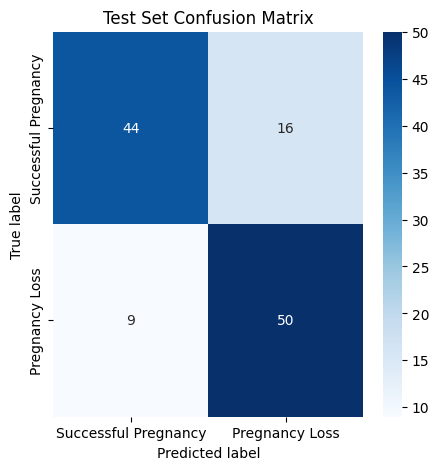

In [50]:
y_pred = xgb.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Successful Pregnancy', 'Pregnancy Loss']
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Test Set Confusion Matrix')
plt.show()

In [51]:
#Show the actual output and confidence of the model. Helpful for Dr. Pinedo.
print("Model Confidence in Test Set")
print("#############################")
for ind,i in enumerate(xgb.predict_proba(X_test_pca)[0:10]):
    if y_test.iloc[ind] == 1:
        res = "Loss of Pregnancy"
    else:
        res = "No Loss of Pregnancy"
    print("Predicted Probability of Pregnancy Loss: " , round(100 * i[1],3), "%   ->   Actual Result: ", res)

Model Confidence in Test Set
#############################
Predicted Probability of Pregnancy Loss:  96.809 %   ->   Actual Result:  Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  90.002 %   ->   Actual Result:  Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  60.869 %   ->   Actual Result:  Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  99.559 %   ->   Actual Result:  Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  96.426 %   ->   Actual Result:  Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  40.001 %   ->   Actual Result:  No Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  96.395 %   ->   Actual Result:  Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  94.277 %   ->   Actual Result:  No Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  45.979 %   ->   Actual Result:  No Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  1.03 %   ->   Actual Result:  No Loss of Pregnancy


In [52]:
#Show the actual output and confidence of the model. Helpful for Dr. Pinedo.
print("Model Confidence in Extra Test Dataset (only No Loss of Preg)")
print("#############################")
for ind,i in enumerate(xgb.predict_proba(X_unused_pca)[100:120]):
    if y_unused.iloc[ind] == 1:
        res = "Loss of Pregnancy"
    else:
        res = "No Loss of Pregnancy"
    print("Predicted Probability of Pregnancy Loss: " , round(100 * i[1],3), "%   ->   Actual Result: ", res)

Model Confidence in Extra Test Dataset (only No Loss of Preg)
#############################
Predicted Probability of Pregnancy Loss:  0.038 %   ->   Actual Result:  No Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  0.419 %   ->   Actual Result:  No Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  1.219 %   ->   Actual Result:  No Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  88.021 %   ->   Actual Result:  No Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  1.367 %   ->   Actual Result:  No Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  0.153 %   ->   Actual Result:  No Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  0.182 %   ->   Actual Result:  No Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  85.741 %   ->   Actual Result:  No Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  0.905 %   ->   Actual Result:  No Loss of Pregnancy
Predicted Probability of Pregnancy Loss:  0.034 %   ->   Act

In [53]:
importances = xgb.feature_importances_
feature_names = xgb.get_booster().feature_names
pd.DataFrame([importances], columns = [feature_names],index = ["Feature Importance"]).T.sort_values("Feature Importance",ascending = False).iloc[:10,:]

,Feature Importance
tmsbred,0.143200
outcome1AI,0.081748
1,0.031711
pregnancy_DIM,0.027828
lame,0.021131
23,0.020815
44,0.020697
40,0.020245
5,0.019859
nadirBCS,0.019094
